In [3]:
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download
import spacy
import gensim.downloader
from transvec.transformers import TranslationWordVectorizer
from glove import Corpus, Glove
import unicodedata

In [5]:
import subprocess
import os
import fnmatch
from lxml import etree as et
import string
import io
import numpy as np

In [ ]:
# ATTENTION, LE FICHIER ACTUEL A ÉTÉ CORRIGÉ À LA MAIN, NE PAS RETAGGER

#def tag(source, target):
    #subprocess.call(['java','-jar','tagging.jar', source, target])
#tag('./txts/odyssey_fr','./tagged')

In [20]:
def align_models(source_language, target_language, source_model, target_model):
    subprocess.call(['python', './MUSE/unsupervised.py', '--src_lang', source_language, '--tgt_lang', target_language, '--src_emb', source_model, '--tgt_emb', target_model, '--n_refinement', '5'])

In [14]:
tree=et.parse("./tagged/odyssee_fr.xml")

In [4]:
f = open("stopwords_gk.txt", "r",encoding='utf-8')
stopwords_gk=[]
for word in f.read().split("\n"):
    stopwords_gk.append(unicodedata.normalize("NFD", word))

In [16]:
f2 = open("stopwords_gk.txt", "r",encoding='utf-8')
stopwords_gk_combined=[]
for word in f2.read().split("\n"):
    stopwords_gk_combined.append(word)

In [17]:
f = open("stopwords.txt", "r",encoding='utf-8')
stopwords=f.read().split("\n")

In [23]:
fr_lemmatized_sentences=[]
for p in tree.findall(".//sentence"):
    sentence=[]
    for word in p.findall(".//word"):
        if word.attrib["lemma"]!=" " and word.attrib["lemma"] not in stopwords and word.attrib["lemma"]!="" and word.attrib["form"] not in string.punctuation:
            sentence.append(word.attrib["lemma"])
    fr_lemmatized_sentences.append(sentence)

<h2>Si besoin d'analyser le grec</h2>

In [15]:
do_download = False
if do_download:
    for dl in download("fr"):
        x = 1

In [6]:
from pie_extended.models.grc.imports import get_iterator_and_processor

greek_model = "grc"
tagger = get_tagger(greek_model, batch_size=256, device="cpu", model_path=None)

In [7]:
gk_lemmatized_sentences = []
iterator, processor = get_iterator_and_processor()

for form in tagger.iter_tag_token(gk_text, iterator=iterator, processor=processor):
    if form["form"].startswith("[REF:"):
        gk_lemmatized_sentences.append([])
    else:
        if form["lemma"] not in stopwords_gk and form["pos"]!="u" and form["form"] not in string.punctuation:
            gk_lemmatized_sentences[-1].append(form["lemma"])

<h2>si texte grec déjà taggé</h2>

In [18]:
tree_grec=et.parse("./txts/odyssey_gk/odyssey_gk.xml")

In [19]:
gk_lemmatized_sentences = []
for p in tree_grec.findall(".//sentence"):
    sentence=[]
    for word in p.findall(".//word"):
        if "lemma" in word.attrib:
            if word.attrib["lemma"]!=" " and word.attrib["lemma"] not in stopwords_gk_combined and word.attrib["lemma"]!="" and word.attrib["form"] not in string.punctuation:
                sentence.append(word.attrib["lemma"])
    gk_lemmatized_sentences.append(sentence)

<h2>building models</h2>

In [8]:
with open('gk_lemma_sentences.txt', 'w') as a_file:
    for sent in gk_lemmatized_sentences:
        a_file.write(" ".join(sent))
        a_file.write("\n")
    a_file.close()

In [24]:
print("lemmatized sentences in Greek : "+str(len(gk_lemmatized_sentences)))
print("lemmatized sentences in French : "+str(len(fr_lemmatized_sentences)))

lemmatized sentences in Greek : 6723
lemmatized sentences in French : 3411


In [55]:
combined_sentences = []
for i, elem in enumerate(gk_lemmatized_sentences):
    combined_sentences.append(gk_lemmatized_sentences[i]+fr_lemmatized_sentences[i])

In [25]:
greek_model = Word2Vec(gk_lemmatized_sentences, min_count=1,max_vocab_size=50000, negative=10, iter=500, size=300)

2021-03-25 15:33:17,786 : collecting all words and their counts
2021-03-25 15:33:17,788 : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-25 15:33:17,812 : collected 5465 word types from a corpus of 48788 raw words and 6723 sentences
2021-03-25 15:33:17,814 : Loading a fresh vocabulary
2021-03-25 15:33:17,824 : effective_min_count=1 retains 5465 unique words (100% of original 5465, drops 0)
2021-03-25 15:33:17,825 : effective_min_count=1 leaves 48788 word corpus (100% of original 48788, drops 0)
2021-03-25 15:33:17,838 : deleting the raw counts dictionary of 5465 items
2021-03-25 15:33:17,839 : sample=0.001 downsamples 42 most-common words
2021-03-25 15:33:17,839 : downsampling leaves estimated 42793 word corpus (87.7% of prior 48788)
2021-03-25 15:33:17,848 : estimated required memory for 5465 words and 300 dimensions: 15848500 bytes
2021-03-25 15:33:17,849 : resetting layer weights
2021-03-25 15:33:18,585 : training model with 3 workers on 5465 vocabulary an

2021-03-25 15:33:20,534 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:20,549 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:20,555 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:20,556 : EPOCH - 20 : training on 48788 raw words (42812 effective words) took 0.1s, 508996 effective words/s
2021-03-25 15:33:20,628 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:20,642 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:20,651 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:20,652 : EPOCH - 21 : training on 48788 raw words (42716 effective words) took 0.1s, 485997 effective words/s
2021-03-25 15:33:20,723 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:20,745 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:20,746 : worker thread finished; awaiting finish of 0 mor

2021-03-25 15:33:22,614 : EPOCH - 41 : training on 48788 raw words (42900 effective words) took 0.1s, 490812 effective words/s
2021-03-25 15:33:22,683 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:22,701 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:22,702 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:22,703 : EPOCH - 42 : training on 48788 raw words (42774 effective words) took 0.1s, 530389 effective words/s
2021-03-25 15:33:22,773 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:22,790 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:22,791 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:22,792 : EPOCH - 43 : training on 48788 raw words (42779 effective words) took 0.1s, 525567 effective words/s
2021-03-25 15:33:22,859 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:22,868 : worke

2021-03-25 15:33:24,648 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:24,649 : EPOCH - 63 : training on 48788 raw words (42694 effective words) took 0.1s, 549433 effective words/s
2021-03-25 15:33:24,718 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:24,735 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:24,736 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:24,737 : EPOCH - 64 : training on 48788 raw words (42859 effective words) took 0.1s, 531359 effective words/s
2021-03-25 15:33:24,804 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:24,831 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:24,835 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:24,836 : EPOCH - 65 : training on 48788 raw words (42821 effective words) took 0.1s, 470255 effective words/s
2021-03-25 15:33:24,909 : worke

2021-03-25 15:33:26,638 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:26,642 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:26,643 : EPOCH - 85 : training on 48788 raw words (42801 effective words) took 0.1s, 584864 effective words/s
2021-03-25 15:33:26,708 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:26,723 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:26,731 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:26,732 : EPOCH - 86 : training on 48788 raw words (42784 effective words) took 0.1s, 527706 effective words/s
2021-03-25 15:33:26,798 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:26,805 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:26,812 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:26,814 : EPOCH - 87 : training on 48788 raw words (42831 

2021-03-25 15:33:28,463 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:28,477 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:28,483 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:28,484 : EPOCH - 107 : training on 48788 raw words (42758 effective words) took 0.1s, 566385 effective words/s
2021-03-25 15:33:28,548 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:28,563 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:28,567 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:28,568 : EPOCH - 108 : training on 48788 raw words (42820 effective words) took 0.1s, 555454 effective words/s
2021-03-25 15:33:28,634 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:28,641 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:28,647 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:33:30,206 : EPOCH - 128 : training on 48788 raw words (42842 effective words) took 0.1s, 559078 effective words/s
2021-03-25 15:33:30,268 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:30,280 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:30,286 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:30,287 : EPOCH - 129 : training on 48788 raw words (42802 effective words) took 0.1s, 590632 effective words/s
2021-03-25 15:33:30,349 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:30,359 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:30,364 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:30,365 : EPOCH - 130 : training on 48788 raw words (42845 effective words) took 0.1s, 603115 effective words/s
2021-03-25 15:33:30,424 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:30,451 : wo

2021-03-25 15:33:32,071 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:32,076 : EPOCH - 150 : training on 48788 raw words (42806 effective words) took 0.1s, 556745 effective words/s
2021-03-25 15:33:32,143 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:32,151 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:32,159 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:32,160 : EPOCH - 151 : training on 48788 raw words (42845 effective words) took 0.1s, 568720 effective words/s
2021-03-25 15:33:32,223 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:32,242 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:32,243 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:32,244 : EPOCH - 152 : training on 48788 raw words (42879 effective words) took 0.1s, 560214 effective words/s
2021-03-25 15:33:32,310 : wo

2021-03-25 15:33:33,872 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:33,878 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:33,879 : EPOCH - 172 : training on 48788 raw words (42851 effective words) took 0.1s, 602299 effective words/s
2021-03-25 15:33:33,939 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:33,957 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:33,958 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:33,959 : EPOCH - 173 : training on 48788 raw words (42774 effective words) took 0.1s, 591393 effective words/s
2021-03-25 15:33:34,020 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:34,035 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:34,037 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:34,037 : EPOCH - 174 : training on 48788 raw words (428

2021-03-25 15:33:35,703 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:35,708 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:35,718 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:35,719 : EPOCH - 194 : training on 48788 raw words (42805 effective words) took 0.1s, 578012 effective words/s
2021-03-25 15:33:35,785 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:35,800 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:35,802 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:35,802 : EPOCH - 195 : training on 48788 raw words (42774 effective words) took 0.1s, 564837 effective words/s
2021-03-25 15:33:35,861 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:35,875 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:35,879 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:33:37,471 : EPOCH - 215 : training on 48788 raw words (42835 effective words) took 0.1s, 604564 effective words/s
2021-03-25 15:33:37,536 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:37,546 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:37,554 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:37,555 : EPOCH - 216 : training on 48788 raw words (42794 effective words) took 0.1s, 558239 effective words/s
2021-03-25 15:33:37,622 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:37,632 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:37,637 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:37,638 : EPOCH - 217 : training on 48788 raw words (42736 effective words) took 0.1s, 581981 effective words/s
2021-03-25 15:33:37,701 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:37,715 : wo

2021-03-25 15:33:39,232 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:39,233 : EPOCH - 237 : training on 48788 raw words (42848 effective words) took 0.1s, 555837 effective words/s
2021-03-25 15:33:39,294 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:39,325 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:39,333 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:39,334 : EPOCH - 238 : training on 48788 raw words (42742 effective words) took 0.1s, 458331 effective words/s
2021-03-25 15:33:39,403 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:39,417 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:39,424 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:39,425 : EPOCH - 239 : training on 48788 raw words (42730 effective words) took 0.1s, 508217 effective words/s
2021-03-25 15:33:39,491 : wo

2021-03-25 15:33:41,030 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:41,039 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:41,040 : EPOCH - 259 : training on 48788 raw words (42884 effective words) took 0.1s, 525175 effective words/s
2021-03-25 15:33:41,106 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:41,122 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:41,130 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:41,131 : EPOCH - 260 : training on 48788 raw words (42875 effective words) took 0.1s, 515430 effective words/s
2021-03-25 15:33:41,196 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:41,202 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:41,218 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:41,219 : EPOCH - 261 : training on 48788 raw words (428

2021-03-25 15:33:42,865 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:42,884 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:42,885 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:42,886 : EPOCH - 281 : training on 48788 raw words (42806 effective words) took 0.1s, 588473 effective words/s
2021-03-25 15:33:42,950 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:42,964 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:42,969 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:42,970 : EPOCH - 282 : training on 48788 raw words (42839 effective words) took 0.1s, 558038 effective words/s
2021-03-25 15:33:43,034 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:43,041 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:43,047 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:33:44,645 : EPOCH - 302 : training on 48788 raw words (42883 effective words) took 0.1s, 519754 effective words/s
2021-03-25 15:33:44,711 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:44,726 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:44,727 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:44,728 : EPOCH - 303 : training on 48788 raw words (42866 effective words) took 0.1s, 569566 effective words/s
2021-03-25 15:33:44,790 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:44,808 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:44,809 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:44,810 : EPOCH - 304 : training on 48788 raw words (42767 effective words) took 0.1s, 572041 effective words/s
2021-03-25 15:33:44,873 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:44,883 : wo

2021-03-25 15:33:46,444 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:46,445 : EPOCH - 324 : training on 48788 raw words (42765 effective words) took 0.1s, 617238 effective words/s
2021-03-25 15:33:46,508 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:46,524 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:46,525 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:46,526 : EPOCH - 325 : training on 48788 raw words (42809 effective words) took 0.1s, 585572 effective words/s
2021-03-25 15:33:46,592 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:46,606 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:46,613 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:46,614 : EPOCH - 326 : training on 48788 raw words (42808 effective words) took 0.1s, 530486 effective words/s
2021-03-25 15:33:46,679 : wo

2021-03-25 15:33:48,258 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:48,266 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:48,267 : EPOCH - 346 : training on 48788 raw words (42890 effective words) took 0.1s, 570826 effective words/s
2021-03-25 15:33:48,332 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:48,339 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:48,353 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:48,354 : EPOCH - 347 : training on 48788 raw words (42759 effective words) took 0.1s, 540824 effective words/s
2021-03-25 15:33:48,417 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:48,436 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:48,441 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:48,442 : EPOCH - 348 : training on 48788 raw words (427

2021-03-25 15:33:50,097 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:50,106 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:50,118 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:50,119 : EPOCH - 368 : training on 48788 raw words (42748 effective words) took 0.1s, 548747 effective words/s
2021-03-25 15:33:50,185 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:50,198 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:50,207 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:50,208 : EPOCH - 369 : training on 48788 raw words (42834 effective words) took 0.1s, 520959 effective words/s
2021-03-25 15:33:50,276 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:50,291 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:50,293 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:33:51,897 : EPOCH - 389 : training on 48788 raw words (42767 effective words) took 0.1s, 618233 effective words/s
2021-03-25 15:33:51,956 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:51,967 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:51,973 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:51,974 : EPOCH - 390 : training on 48788 raw words (42791 effective words) took 0.1s, 611440 effective words/s
2021-03-25 15:33:52,036 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:52,047 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:52,054 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:52,055 : EPOCH - 391 : training on 48788 raw words (42733 effective words) took 0.1s, 585042 effective words/s
2021-03-25 15:33:52,117 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:52,132 : wo

2021-03-25 15:33:53,688 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:53,688 : EPOCH - 411 : training on 48788 raw words (42860 effective words) took 0.1s, 597129 effective words/s
2021-03-25 15:33:53,749 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:53,760 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:53,765 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:53,766 : EPOCH - 412 : training on 48788 raw words (42788 effective words) took 0.1s, 613408 effective words/s
2021-03-25 15:33:53,829 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:53,836 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:53,843 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:53,844 : EPOCH - 413 : training on 48788 raw words (42754 effective words) took 0.1s, 599932 effective words/s
2021-03-25 15:33:53,907 : wo

2021-03-25 15:33:55,451 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:55,457 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:55,458 : EPOCH - 433 : training on 48788 raw words (42810 effective words) took 0.1s, 605650 effective words/s
2021-03-25 15:33:55,523 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:55,539 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:55,547 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:55,548 : EPOCH - 434 : training on 48788 raw words (42776 effective words) took 0.1s, 522779 effective words/s
2021-03-25 15:33:55,613 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:55,625 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:55,629 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:55,630 : EPOCH - 435 : training on 48788 raw words (427

2021-03-25 15:33:57,222 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:57,236 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:57,237 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:57,238 : EPOCH - 455 : training on 48788 raw words (42832 effective words) took 0.1s, 567194 effective words/s
2021-03-25 15:33:57,302 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:57,308 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:57,322 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:57,323 : EPOCH - 456 : training on 48788 raw words (42810 effective words) took 0.1s, 630240 effective words/s
2021-03-25 15:33:57,390 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:57,407 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:57,408 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:33:59,025 : EPOCH - 476 : training on 48788 raw words (42779 effective words) took 0.1s, 557156 effective words/s
2021-03-25 15:33:59,087 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:59,111 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:59,112 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:59,113 : EPOCH - 477 : training on 48788 raw words (42692 effective words) took 0.1s, 531952 effective words/s
2021-03-25 15:33:59,175 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:59,183 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:33:59,190 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:33:59,191 : EPOCH - 478 : training on 48788 raw words (42681 effective words) took 0.1s, 610315 effective words/s
2021-03-25 15:33:59,252 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:33:59,270 : wo

2021-03-25 15:34:00,830 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:00,831 : EPOCH - 498 : training on 48788 raw words (42794 effective words) took 0.1s, 618867 effective words/s
2021-03-25 15:34:00,891 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:00,909 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:00,910 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:00,911 : EPOCH - 499 : training on 48788 raw words (42785 effective words) took 0.1s, 591404 effective words/s
2021-03-25 15:34:00,975 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:00,990 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:00,991 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:00,992 : EPOCH - 500 : training on 48788 raw words (42840 effective words) took 0.1s, 584021 effective words/s
2021-03-25 15:34:00,993 : tr

In [26]:
french_model = Word2Vec(fr_lemmatized_sentences, min_count=1,max_vocab_size=50000, negative=10, iter=500, size=300)

2021-03-25 15:34:05,889 : collecting all words and their counts
2021-03-25 15:34:05,891 : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-25 15:34:05,914 : collected 3757 word types from a corpus of 49529 raw words and 3411 sentences
2021-03-25 15:34:05,915 : Loading a fresh vocabulary
2021-03-25 15:34:05,923 : effective_min_count=1 retains 3757 unique words (100% of original 3757, drops 0)
2021-03-25 15:34:05,924 : effective_min_count=1 leaves 49529 word corpus (100% of original 49529, drops 0)
2021-03-25 15:34:05,934 : deleting the raw counts dictionary of 3757 items
2021-03-25 15:34:05,935 : sample=0.001 downsamples 52 most-common words
2021-03-25 15:34:05,936 : downsampling leaves estimated 45340 word corpus (91.5% of prior 49529)
2021-03-25 15:34:05,941 : estimated required memory for 3757 words and 300 dimensions: 10895300 bytes
2021-03-25 15:34:05,942 : resetting layer weights
2021-03-25 15:34:06,448 : training model with 3 workers on 3757 vocabulary an

2021-03-25 15:34:08,392 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:08,424 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:08,425 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:08,426 : EPOCH - 20 : training on 49529 raw words (45387 effective words) took 0.1s, 527648 effective words/s
2021-03-25 15:34:08,490 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:08,511 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:08,520 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:08,521 : EPOCH - 21 : training on 49529 raw words (45399 effective words) took 0.1s, 520738 effective words/s
2021-03-25 15:34:08,586 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:08,605 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:08,611 : worker thread finished; awaiting finish of 0 mor

2021-03-25 15:34:10,394 : EPOCH - 41 : training on 49529 raw words (45298 effective words) took 0.1s, 536733 effective words/s
2021-03-25 15:34:10,471 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:10,505 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:10,513 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:10,514 : EPOCH - 42 : training on 49529 raw words (45374 effective words) took 0.1s, 405068 effective words/s
2021-03-25 15:34:10,585 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:10,598 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:10,608 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:10,609 : EPOCH - 43 : training on 49529 raw words (45285 effective words) took 0.1s, 518944 effective words/s
2021-03-25 15:34:10,670 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:10,699 : worke

2021-03-25 15:34:12,470 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:12,471 : EPOCH - 63 : training on 49529 raw words (45316 effective words) took 0.1s, 551841 effective words/s
2021-03-25 15:34:12,537 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:12,551 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:12,559 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:12,560 : EPOCH - 64 : training on 49529 raw words (45377 effective words) took 0.1s, 554751 effective words/s
2021-03-25 15:34:12,619 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:12,646 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:12,647 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:12,648 : EPOCH - 65 : training on 49529 raw words (45441 effective words) took 0.1s, 565565 effective words/s
2021-03-25 15:34:12,713 : worke

2021-03-25 15:34:14,502 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:14,506 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:14,507 : EPOCH - 85 : training on 49529 raw words (45276 effective words) took 0.1s, 411984 effective words/s
2021-03-25 15:34:14,570 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:14,596 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:14,599 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:14,600 : EPOCH - 86 : training on 49529 raw words (45356 effective words) took 0.1s, 532563 effective words/s
2021-03-25 15:34:14,660 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:14,677 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:14,687 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:14,688 : EPOCH - 87 : training on 49529 raw words (45359 

2021-03-25 15:34:16,434 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:16,449 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:16,457 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:16,458 : EPOCH - 107 : training on 49529 raw words (45329 effective words) took 0.1s, 575879 effective words/s
2021-03-25 15:34:16,518 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:16,542 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:16,544 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:16,545 : EPOCH - 108 : training on 49529 raw words (45355 effective words) took 0.1s, 573122 effective words/s
2021-03-25 15:34:16,603 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:16,629 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:16,630 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:34:18,277 : EPOCH - 128 : training on 49529 raw words (45318 effective words) took 0.1s, 607196 effective words/s
2021-03-25 15:34:18,336 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:18,356 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:18,377 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:18,378 : EPOCH - 129 : training on 49529 raw words (45424 effective words) took 0.1s, 485914 effective words/s
2021-03-25 15:34:18,447 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:18,469 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:18,471 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:18,471 : EPOCH - 130 : training on 49529 raw words (45258 effective words) took 0.1s, 527494 effective words/s
2021-03-25 15:34:18,534 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:18,547 : wo

2021-03-25 15:34:20,262 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:20,262 : EPOCH - 150 : training on 49529 raw words (45348 effective words) took 0.1s, 563929 effective words/s
2021-03-25 15:34:20,324 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:20,339 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:20,343 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:20,344 : EPOCH - 151 : training on 49529 raw words (45340 effective words) took 0.1s, 613514 effective words/s
2021-03-25 15:34:20,401 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:20,427 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:20,429 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:20,430 : EPOCH - 152 : training on 49529 raw words (45335 effective words) took 0.1s, 577549 effective words/s
2021-03-25 15:34:20,488 : wo

2021-03-25 15:34:22,111 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:22,119 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:22,120 : EPOCH - 172 : training on 49529 raw words (45320 effective words) took 0.1s, 588826 effective words/s
2021-03-25 15:34:22,175 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:22,202 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:22,203 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:22,204 : EPOCH - 173 : training on 49529 raw words (45384 effective words) took 0.1s, 591257 effective words/s
2021-03-25 15:34:22,262 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:22,281 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:22,289 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:22,290 : EPOCH - 174 : training on 49529 raw words (452

2021-03-25 15:34:24,045 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:24,062 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:24,072 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:24,072 : EPOCH - 194 : training on 49529 raw words (45236 effective words) took 0.1s, 490412 effective words/s
2021-03-25 15:34:24,129 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:24,153 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:24,155 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:24,156 : EPOCH - 195 : training on 49529 raw words (45367 effective words) took 0.1s, 595284 effective words/s
2021-03-25 15:34:24,212 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:24,239 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:24,240 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:34:25,951 : EPOCH - 215 : training on 49529 raw words (45295 effective words) took 0.1s, 567207 effective words/s
2021-03-25 15:34:26,012 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:26,027 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:26,038 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:26,039 : EPOCH - 216 : training on 49529 raw words (45389 effective words) took 0.1s, 560587 effective words/s
2021-03-25 15:34:26,099 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:26,116 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:26,126 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:26,127 : EPOCH - 217 : training on 49529 raw words (45380 effective words) took 0.1s, 567584 effective words/s
2021-03-25 15:34:26,190 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:26,217 : wo

2021-03-25 15:34:27,964 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:27,965 : EPOCH - 237 : training on 49529 raw words (45362 effective words) took 0.1s, 524375 effective words/s
2021-03-25 15:34:28,024 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:28,051 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:28,052 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:28,053 : EPOCH - 238 : training on 49529 raw words (45359 effective words) took 0.1s, 564192 effective words/s
2021-03-25 15:34:28,112 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:28,130 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:28,136 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:28,137 : EPOCH - 239 : training on 49529 raw words (45287 effective words) took 0.1s, 588837 effective words/s
2021-03-25 15:34:28,205 : wo

2021-03-25 15:34:29,856 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:29,858 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:29,859 : EPOCH - 259 : training on 49529 raw words (45286 effective words) took 0.1s, 561071 effective words/s
2021-03-25 15:34:29,920 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:29,944 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:29,947 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:29,948 : EPOCH - 260 : training on 49529 raw words (45316 effective words) took 0.1s, 554883 effective words/s
2021-03-25 15:34:30,008 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:30,023 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:30,033 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:30,034 : EPOCH - 261 : training on 49529 raw words (453

2021-03-25 15:34:31,722 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:31,740 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:31,747 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:31,748 : EPOCH - 281 : training on 49529 raw words (45351 effective words) took 0.1s, 579310 effective words/s
2021-03-25 15:34:31,808 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:31,824 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:31,833 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:31,834 : EPOCH - 282 : training on 49529 raw words (45340 effective words) took 0.1s, 577327 effective words/s
2021-03-25 15:34:31,894 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:31,910 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:31,919 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:34:33,547 : EPOCH - 302 : training on 49529 raw words (45334 effective words) took 0.1s, 620190 effective words/s
2021-03-25 15:34:33,606 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:33,624 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:33,626 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:33,627 : EPOCH - 303 : training on 49529 raw words (45366 effective words) took 0.1s, 630101 effective words/s
2021-03-25 15:34:33,694 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:33,706 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:33,720 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:33,722 : EPOCH - 304 : training on 49529 raw words (45423 effective words) took 0.1s, 519387 effective words/s
2021-03-25 15:34:33,783 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:33,798 : wo

2021-03-25 15:34:35,482 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:35,483 : EPOCH - 324 : training on 49529 raw words (45277 effective words) took 0.1s, 539324 effective words/s
2021-03-25 15:34:35,545 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:35,567 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:35,569 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:35,570 : EPOCH - 325 : training on 49529 raw words (45283 effective words) took 0.1s, 571873 effective words/s
2021-03-25 15:34:35,629 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:35,656 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:35,658 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:35,659 : EPOCH - 326 : training on 49529 raw words (45351 effective words) took 0.1s, 558528 effective words/s
2021-03-25 15:34:35,718 : wo

2021-03-25 15:34:37,520 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:37,531 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:37,532 : EPOCH - 346 : training on 49529 raw words (45358 effective words) took 0.1s, 547299 effective words/s
2021-03-25 15:34:37,594 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:37,627 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:37,629 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:37,630 : EPOCH - 347 : training on 49529 raw words (45327 effective words) took 0.1s, 511452 effective words/s
2021-03-25 15:34:37,693 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:37,713 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:37,719 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:37,720 : EPOCH - 348 : training on 49529 raw words (453

2021-03-25 15:34:39,405 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:39,432 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:39,433 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:39,434 : EPOCH - 368 : training on 49529 raw words (45298 effective words) took 0.1s, 564568 effective words/s
2021-03-25 15:34:39,495 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:39,512 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:39,517 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:39,518 : EPOCH - 369 : training on 49529 raw words (45255 effective words) took 0.1s, 594360 effective words/s
2021-03-25 15:34:39,578 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:39,593 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:39,597 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:34:41,278 : EPOCH - 389 : training on 49529 raw words (45407 effective words) took 0.1s, 568297 effective words/s
2021-03-25 15:34:41,341 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:41,358 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:41,366 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:41,368 : EPOCH - 390 : training on 49529 raw words (45416 effective words) took 0.1s, 568153 effective words/s
2021-03-25 15:34:41,429 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:41,446 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:41,450 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:41,451 : EPOCH - 391 : training on 49529 raw words (45428 effective words) took 0.1s, 594781 effective words/s
2021-03-25 15:34:41,508 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:41,538 : wo

2021-03-25 15:34:43,255 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:43,256 : EPOCH - 411 : training on 49529 raw words (45318 effective words) took 0.1s, 563866 effective words/s
2021-03-25 15:34:43,318 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:43,333 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:43,341 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:43,342 : EPOCH - 412 : training on 49529 raw words (45238 effective words) took 0.1s, 564097 effective words/s
2021-03-25 15:34:43,399 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:43,420 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:43,427 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:43,428 : EPOCH - 413 : training on 49529 raw words (45307 effective words) took 0.1s, 574676 effective words/s
2021-03-25 15:34:43,490 : wo

2021-03-25 15:34:45,176 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:45,182 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:45,183 : EPOCH - 433 : training on 49529 raw words (45379 effective words) took 0.1s, 594679 effective words/s
2021-03-25 15:34:45,243 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:45,260 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:45,262 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:45,263 : EPOCH - 434 : training on 49529 raw words (45323 effective words) took 0.1s, 672024 effective words/s
2021-03-25 15:34:45,326 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:45,340 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:45,351 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:45,352 : EPOCH - 435 : training on 49529 raw words (453

2021-03-25 15:34:47,041 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:47,060 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:47,063 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:47,064 : EPOCH - 455 : training on 49529 raw words (45400 effective words) took 0.1s, 610666 effective words/s
2021-03-25 15:34:47,121 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:47,141 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:47,149 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:47,150 : EPOCH - 456 : training on 49529 raw words (45289 effective words) took 0.1s, 586909 effective words/s
2021-03-25 15:34:47,211 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:47,250 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:47,253 : worker thread finished; awaiting finish of 0 m

2021-03-25 15:34:48,958 : EPOCH - 476 : training on 49529 raw words (45312 effective words) took 0.1s, 597904 effective words/s
2021-03-25 15:34:49,016 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:49,035 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:49,043 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:49,044 : EPOCH - 477 : training on 49529 raw words (45336 effective words) took 0.1s, 571670 effective words/s
2021-03-25 15:34:49,107 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:49,125 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:49,136 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:49,137 : EPOCH - 478 : training on 49529 raw words (45292 effective words) took 0.1s, 536289 effective words/s
2021-03-25 15:34:49,200 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:49,218 : wo

2021-03-25 15:34:50,902 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:50,903 : EPOCH - 498 : training on 49529 raw words (45399 effective words) took 0.1s, 589976 effective words/s
2021-03-25 15:34:50,958 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:50,982 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:50,987 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:50,988 : EPOCH - 499 : training on 49529 raw words (45304 effective words) took 0.1s, 596145 effective words/s
2021-03-25 15:34:51,052 : worker thread finished; awaiting finish of 2 more threads
2021-03-25 15:34:51,067 : worker thread finished; awaiting finish of 1 more threads
2021-03-25 15:34:51,078 : worker thread finished; awaiting finish of 0 more threads
2021-03-25 15:34:51,079 : EPOCH - 500 : training on 49529 raw words (45353 effective words) took 0.1s, 545436 effective words/s
2021-03-25 15:34:51,080 : tr

In [27]:
greek_model.wv.save_word2vec_format("./MUSE/greek.txt")

2021-03-25 15:35:21,864 : storing 5465x300 projection weights into ./MUSE/greek.txt


In [28]:
french_model.wv.save_word2vec_format("./MUSE/french.txt")

2021-03-25 15:35:23,319 : storing 3757x300 projection weights into ./MUSE/french.txt


In [29]:
gk_model = KeyedVectors.load_word2vec_format("./MUSE/greek.txt",binary=False)
fr_model = KeyedVectors.load_word2vec_format("./MUSE/french.txt",binary=False)

2021-03-25 15:35:27,990 : loading projection weights from ./MUSE/greek.txt
2021-03-25 15:35:29,102 : loaded (5465, 300) matrix from ./MUSE/greek.txt
2021-03-25 15:35:29,103 : loading projection weights from ./MUSE/french.txt
2021-03-25 15:35:29,842 : loaded (3757, 300) matrix from ./MUSE/french.txt


In [30]:
fr_model.similar_by_vector("Apollon", 1)

2021-03-25 15:35:31,666 : precomputing L2-norms of word weight vectors


[('Euryte', 0.42622342705726624)]

In [31]:
result = fr_model.similar_by_vector('mourir', topn=10)
print(result)

[('futur', 0.24983856081962585), ('éternuer', 0.2242315709590912), ('Atrée', 0.21700823307037354), ('Parques', 0.21651192009449005), ('périr', 0.21464170515537262), ('Eurynome', 0.21157893538475037), ('gloire', 0.20897579193115234), ('meurtre', 0.20811885595321655), ('Alcméon', 0.19901958107948303), ('renommé', 0.1976076364517212)]


In [23]:
print(gk_model.wv.vocab)

{'θεός': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4dbb0>, 'ναῦς': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4d040>, 'Τηλέμαχος': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4d370>, 'ἀνήρ': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4d3d0>, 'ἔρχομαι': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4d910>, '·': <gensim.models.keyedvectors.Vocab object at 0x7fcdb2e4d9a0>, 'Ὀδυσσεύς': <gensim.models.keyedvectors.Vocab object at 0x7fcea450aa30>, 'φίλος': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18d60>, 'πατήρ': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18be0>, 'υἱός': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18df0>, 'Ἀθήνη': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18e20>, 'θυμός': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18d90>, 'οἶδα': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18eb0>, 'κακός': <gensim.models.keyedvectors.Vocab object at 0x7fce3ae18c40>, 

<ipython-input-23-6f468fc03409>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  print(gk_model.wv.vocab)


In [24]:
print(fr_model.wv.vocab)

{'homme': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5b80>, 'aller': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5970>, 'chose': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5730>, 'dieu': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5910>, 'vaisseau': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5760>, 'coeur': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5a30>, 'Télémaque': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5940>, 'faire': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5af0>, 'Ulysse': <gensim.models.keyedvectors.Vocab object at 0x7fce3add59a0>, 'mer': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5790>, 'venir': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5850>, 'père': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5b20>, 'donner': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5ac0>, 'savoir': <gensim.models.keyedvectors.Vocab object at 0x7fce3add5be0>, 'voir': <gens

<ipython-input-24-a50e64971b28>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  print(fr_model.wv.vocab)


In [32]:
align_models("el","fr", "./MUSE/greek.txt","./MUSE/french.txt")

<h2>Loading multilingual models</h2>

In [33]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [34]:
src_path = './results/25_03_1626/vectors-el.txt'
tgt_path = './results/25_03_1626/vectors-fr.txt'
nmax = 100000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [35]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [37]:
src_word = 'Ὀδυσσεύς'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "Ὀδυσσεύς":
1.0000 - Ὀδυσσεύς
0.5923 - ·
0.3861 - ἕ
0.3842 - θυμός
0.3817 - ἀνήρ


In [39]:
src_word = 'Ὀδυσσεύς'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=10)

Nearest neighbors of "Ὀδυσσεύς":
0.4178 - accabler
0.3549 - origine
0.2389 - mendiant
0.2306 - Arcésios
0.2107 - poursuivre
0.2021 - bravade
0.1984 - abreuver
0.1977 - solitaire
0.1975 - fuite
0.1959 - aube


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.03


In [41]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

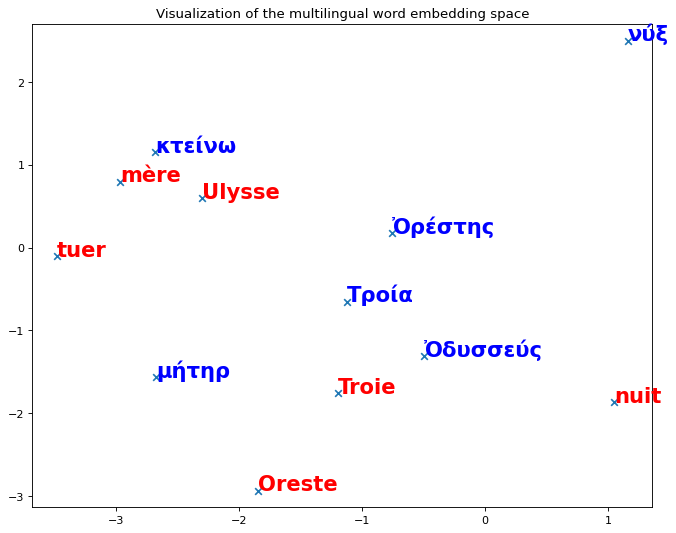

In [44]:
# get 5 random input words
src_words = ['Τροία','Ὀρέστης', 'μήτηρ','κτείνω','νύξ','Ὀδυσσεύς']
tgt_words = ['Troie','Oreste', 'mère','tuer','nuit',"Ulysse"]

# assert words in dictionaries
#for sw in src_words:
    #assert sw in src_word2id, '"%s" not in source dictionary' % sw
#for tw in tgt_words:
    #assert tw in tgt_word2id, '"%s" not in target dictionary' % sw



plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)